In [1]:
import torch 
from PIL import Image 
import torchvision.transforms as transforms 
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

(1852, 3180, 3) <dtype: 'uint8'>
(1852, 3180, 3)
(1852, 3180, 3)
(32, 54, 3)


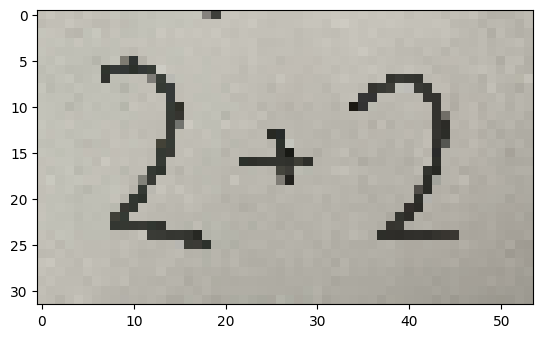

In [2]:
image = tf.io.read_file('sample.jpg')
img_tensor = tf.image.decode_png(image)
print(img_tensor.shape, img_tensor.dtype)
print(img_tensor.shape)
plt.imshow(img_tensor.numpy(), interpolation='nearest')
print(img_tensor.shape)
ar_dfiner = img_tensor.shape[0]/32
img_tensor = tf.image.resize(img_tensor, size = [32, int(img_tensor.shape[1]/ar_dfiner)], method= 'lanczos5')
img_tensor = tf.cast(img_tensor, tf.uint8)
print(img_tensor.shape)
plt.imshow(img_tensor.numpy(), interpolation='nearest')

In [3]:
img_tensor[11][15]
# This section of the tensor represents the first vertical column of  pixels, with their rbg values listed in 3 sections

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([54, 53, 48], dtype=uint8)>

In [4]:
from operator import add
def rbgAvg(tensor):
    array = tensor.numpy()
    sum = [0,0,0]
    for x in array:
        for y in x:
            sum = list(map(add, y, sum))

    return [int(x/(array.size/3)) for x in sum]

In [5]:
avg_rgb = rbgAvg(img_tensor)

Average RGB values in the image

In [6]:
from operator import is_
def breadth_pixel_search(x_start,y_start,tensor,pixel_list,avgrgb):
    if((x_start >= tensor.shape[1]-1) or (y_start >= tensor.shape[0]-1)):
        return
    current_pixel = [y_start,x_start+1,np.array(tensor[y_start][x_start+1])]
    pixel_exists = False
    if np.sum(current_pixel[2]) < sum(avgrgb):
        for x in pixel_list:
            if x[0] == current_pixel[0 ] and x[1] == current_pixel[1]:
                pixel_exists = True
                break
        if pixel_exists == False:
            pixel_list.append((current_pixel))
            breadth_pixel_search(x_start+1,y_start,tensor,pixel_list,avgrgb)
    current_pixel = [y_start,x_start-1,np.array(tensor[y_start][x_start-1])]
    pixel_exists = False
    if np.sum(current_pixel[2]) < sum(avgrgb):
        for x in pixel_list:
            if x[0] == current_pixel[0 ] and x[1] == current_pixel[1]:
                pixel_exists = True
                break
        if pixel_exists == False:
            pixel_list.append((current_pixel))
            breadth_pixel_search(x_start-1,y_start,tensor,pixel_list,avgrgb)
    current_pixel = [y_start+1,x_start,np.array(tensor[y_start+1][x_start])]
    pixel_exists = False
    if np.sum(current_pixel[2]) < sum(avgrgb):
        for x in pixel_list:
            if x[0] == current_pixel[0 ] and x[1] == current_pixel[1]:
                pixel_exists = True
                break
        if pixel_exists == False:
            pixel_list.append((current_pixel))
            breadth_pixel_search(x_start,y_start+1,tensor,pixel_list,avgrgb)
    current_pixel = [y_start-1,x_start,np.array(tensor[y_start - 1][x_start])]
    pixel_exists = False
    if np.sum(current_pixel[2]) < sum(avgrgb):
        for x in pixel_list:
            if x[0] == current_pixel[0 ] and x[1] == current_pixel[1]:
                pixel_exists = True
                break
        if pixel_exists == False:
            pixel_list.append((current_pixel))
            breadth_pixel_search(x_start,y_start - 1,tensor,pixel_list,avgrgb)
    
        

In [7]:
pixel_list = []
breadth_pixel_search(15,10,img_tensor,pixel_list,avg_rgb)
pixel_list

[[10, 14, array([54, 59, 53], dtype=uint8)],
 [10, 15, array([48, 48, 40], dtype=uint8)],
 [11, 15, array([54, 53, 48], dtype=uint8)],
 [11, 14, array([54, 58, 52], dtype=uint8)],
 [12, 14, array([55, 56, 51], dtype=uint8)],
 [12, 15, array([114, 115, 110], dtype=uint8)],
 [13, 14, array([56, 57, 52], dtype=uint8)],
 [14, 14, array([54, 59, 53], dtype=uint8)],
 [14, 13, array([67, 66, 55], dtype=uint8)],
 [15, 13, array([52, 57, 51], dtype=uint8)],
 [15, 14, array([56, 57, 52], dtype=uint8)],
 [16, 13, array([53, 58, 52], dtype=uint8)],
 [17, 13, array([46, 51, 45], dtype=uint8)],
 [17, 12, array([52, 57, 51], dtype=uint8)],
 [18, 12, array([55, 57, 52], dtype=uint8)],
 [18, 11, array([130, 130, 122], dtype=uint8)],
 [19, 11, array([53, 58, 52], dtype=uint8)],
 [20, 11, array([46, 51, 45], dtype=uint8)],
 [20, 10, array([50, 55, 49], dtype=uint8)],
 [21, 10, array([50, 54, 48], dtype=uint8)],
 [21, 9, array([56, 55, 50], dtype=uint8)],
 [22, 9, array([52, 58, 52], dtype=uint8)],
 [22, 

Will also need to be able to shift the x and y values of the pixels as to make them relational to each other on a 32 x 32 plot.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


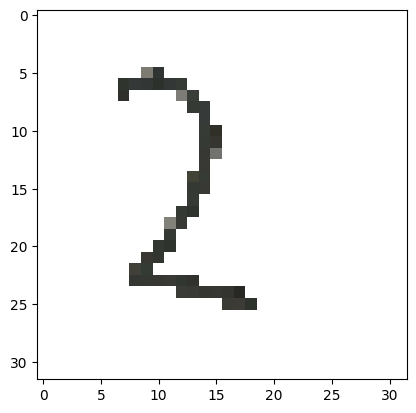

In [8]:
map = np.zeros([32, 32, 3], dtype=int)
map = np.full_like(map, 256)
for x in pixel_list:
    map[x[0]][x[1]] = x[2]
plt.imshow(map, interpolation='nearest')

In [9]:
def horiz_bar_search(img_tensor,rgb_avg):
    digit_operator_list = []
    x = 0
    y  = int(img_tensor.shape[0]/2)
    while x < img_tensor.shape[1] - 1:
        if np.sum(np.array(img_tensor[y][x])) < sum(rgb_avg)*.8:
            pixel_list = []
            breadth_pixel_search(x,y,img_tensor,pixel_list,rgb_avg)
            digit_operator_list.append(pixel_list)
            max_x_value  = digit_operator_list[-1][0][1]
            for j in digit_operator_list[-1][1:]:
                    if j[1] > max_x_value:
                        max_x_value = j[1]
            x = max_x_value
        x += 1
    return digit_operator_list
                


In [10]:
digit_list = horiz_bar_search(img_tensor, avg_rgb)
digit_list

[[[17, 13, array([46, 51, 45], dtype=uint8)],
  [17, 12, array([52, 57, 51], dtype=uint8)],
  [18, 12, array([55, 57, 52], dtype=uint8)],
  [18, 11, array([130, 130, 122], dtype=uint8)],
  [19, 11, array([53, 58, 52], dtype=uint8)],
  [20, 11, array([46, 51, 45], dtype=uint8)],
  [20, 10, array([50, 55, 49], dtype=uint8)],
  [21, 10, array([50, 54, 48], dtype=uint8)],
  [21, 9, array([56, 55, 50], dtype=uint8)],
  [22, 9, array([52, 58, 52], dtype=uint8)],
  [22, 8, array([64, 64, 56], dtype=uint8)],
  [23, 8, array([51, 54, 49], dtype=uint8)],
  [23, 9, array([53, 56, 50], dtype=uint8)],
  [23, 10, array([54, 55, 50], dtype=uint8)],
  [23, 11, array([56, 57, 52], dtype=uint8)],
  [23, 12, array([49, 54, 48], dtype=uint8)],
  [23, 13, array([49, 50, 45], dtype=uint8)],
  [24, 13, array([57, 58, 53], dtype=uint8)],
  [24, 14, array([53, 54, 49], dtype=uint8)],
  [24, 15, array([54, 55, 50], dtype=uint8)],
  [24, 16, array([51, 52, 47], dtype=uint8)],
  [24, 17, array([39, 40, 35], dtype

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16, 23, array([46, 47, 42], dtype=uint8)]
[16, 24, array([49, 50, 45], dtype=uint8)]
[16, 25, array([50, 51, 46], dtype=uint8)]
[16, 26, array([50, 51, 46], dtype=uint8)]
[16, 27, array([48, 49, 44], dtype=uint8)]
[16, 28, array([62, 62, 54], dtype=uint8)]
[16, 29, array([46, 47, 42], dtype=uint8)]
[17, 27, array([61, 60, 55], dtype=uint8)]
[17, 26, array([68, 68, 60], dtype=uint8)]
[18, 26, array([127, 124, 117], dtype=uint8)]
[18, 27, array([34, 33, 29], dtype=uint8)]
[15, 27, array([24, 25, 20], dtype=uint8)]
[15, 26, array([48, 49, 44], dtype=uint8)]
[14, 26, array([45, 50, 44], dtype=uint8)]
[13, 26, array([39, 43, 42], dtype=uint8)]
[13, 25, array([40, 41, 35], dtype=uint8)]
[16, 22, array([44, 49, 43], dtype=uint8)]


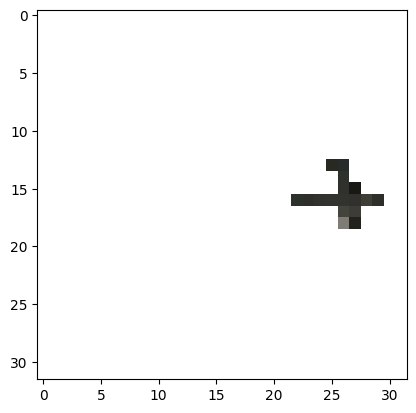

In [37]:
map = np.full_like(np.zeros([32, 32, 3], dtype=int),256)
for x in digit_list[1]:
    print(x)
    map[x[0]][x[1]] = x[2]
plt.imshow(map, interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


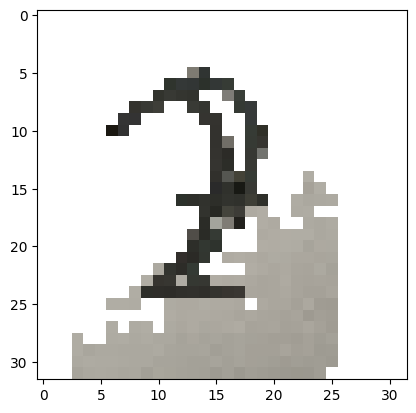

In [39]:
def centered_map(breadth_list):
    centered_elements = [np.full_like(np.zeros([32, 32, 3], dtype=int),256)]*len(breadth_list)
    n = 0
    for x in breadth_list:
        x_values = [j[1] for j in x]
        center_shift = 16 - int(np.median(np.array(x_values)))
        for i in x:
            centered_elements[n][i[0]][(i[1] + center_shift)] = i[2]
        n += 1
    return centered_elements

centered_elements = centered_map(digit_list)
plt.imshow(centered_elements[1], interpolation='nearest')